![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020 - Stephanie Beyer Diaz
# Statistical & Machine Learning Approaches for Marketing

## Assignment 3

**1. Import all required libraries and datasets**

In [ ]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

**Exercise 3 (p. 198, Chap. 5)**<br>
*We now review k-fold cross-validation.<br>
(a) Explain how k-fold cross-validation is implemented.<br>*

It is implemented by first taking the full set with n observations. Then, the set is randomly split into k groups, with groups containing exclusive observations (no overlap between the groups). One of these groups will act as the validation set and the other one will act as a training set. Finally, the test error is estimated by averaging k MSE estimates from the results.

*(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:<br>
i. The validation set approach?<br>*

It is easy to implement because it just requires partitioning training data into two sets. This is also conceptually simple. However, the estimation of the test error rate depends on the observations included in the training and validation sets, so it can have high variance. Additionally, the validation set error rate may result in overestimating the test error rate for the model fit on the overall data set.<br>

*ii. LOOCV?<br>*

LOOCV is a special case of k-fold cross-validation where k and n are the same value (k = n). Because of this, LOOCV is a very computationally intense method because the model is fit as many times as there are observations. Compared to k-fold CV, LOOCV has lower bias but higher variance.

**Exercise 8 (p. 200, Chap. 5)**<br>
*We will now perform cross-validation on a simulated data set.<br>
(a) Generate a simulated data set as follows:*
> set .seed (1)<br>
> y=rnorm (100)<br>
> x=rnorm (100)<br>
> y=x-2* x^2+ rnorm (100)

*In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.*

In [ ]:
set.seed(1)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

#n = 100 (length(y) or length(x)), p = 2 (x,y)
#Equation: Y = X − 2X²+ϵ

*(b) Create a scatterplot of X against Y . Comment on what you find.*

In [ ]:
plot(x, y)

#data shape seems to be quadratic

*(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:*<br>
i. Y = β0 + β1X + ϵ<br>
ii. Y = β0 + β1X + β2X2 + ϵ<br>
iii. Y = β0 + β1X + β2X2 + β3X3 + ϵ<br>
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ

In [ ]:
library(boot)
Data = data.frame(x, y)
set.seed(123)

loocverror = rep(0,4)

for (i in 1:4) {
    glm.fit = glm(y ~ poly(x,i), data=Data)
    loocverror[i] = round(cv.glm(Data, glm.fit)$delta[1],2)
    print(paste0("LOOCV ",i,": ",loocverror[i]))
}

*(d) Repeat (c) using another random seed, and report your results.<br>
Are your results the same as what you got in (c)? Why?*

In [ ]:
set.seed(321)

loocverror = rep(0,4)

for (i in 1:4) {
    glm.fit = glm(y ~ poly(x,i), data=Data)
    loocverror[i] = round(cv.glm(Data, glm.fit)$delta[1],2)
    print(paste0("LOOCV ",i,": ",loocverror[i]))
}

#Same results, a characteristic of LOOCV because it gives approximately unbiased estimates of the test error

*(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.*

In [ ]:
#The quadratic polynomial (last result) had the lowest LOOCV test error rate. 
#This was expected because it matches the true form of Y, as described in exercise b.

*(f) Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?*

In [ ]:
summary(glm.fit)

#p-values show statistical significance for x1 and x2

**Exercise 1 (p. 259, Chap. 6)**<br>
*We perform best subset, forward stepwise, and backward stepwise selection on a single data set. <br>
For each approach, we obtain p + 1 models, containing 0, 1, 2,... , p predictors. <br>
Explain your answers:<br>
(a) Which of the three models with k predictors has the smallest training RSS?*<br>

When performing best subset selection, the model with k predictors is the model with the smallest RSS among all possible models with k predictors. When performing forward stepwise selection, the model with k predictors is the model with the smallest RSS among the p-k models which increase on each step in one additional predictor. When performing backward stepwise selection, the model with k predictors is the model with the smallest RSS among the k models which contains all but one of the predictors in each additional step. The model with k predictors which has the smallest training RSS is the one from best subset selection because it is the one selected among all k predictors models.

*(b) Which of the three models with k predictors has the smallest
test RSS?*<br>
Best subset selection is likely to have the smallest test RSS because it takes into account more models than the other methods. Other selection methods may also result in a smaller test RSS by luck. Dataset may also play a part.

*(c) True or False:*<br>

*i. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection.*<br>
True. Forward selection adds one variable in each step if they comply with a certain threshold. In this case, k-variables are one less predictor less than k+1 variable model.<br>

*ii. The predictors in the k-variable model identified by backward
stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.<br>*
True. Backward selection starts with the full model and removes on predictor per step, so the model with k predictors could be obtained by removing one predictor from the model with (k+1) predictors (as an additional step).<br>

*iii. The predictors in the k-variable model identified by backward
stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.<br>*
False. They may match by coincidence, but there is no direct relationship between the models obtained from forward and a backward selection.<br>

*iv. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.<br>*
False. Same reason as previous question.<br>

*v. The predictors in the k-variable model identified by best
subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.*<br>
False. The model with (k+1) predictors is obtained by selecting among all possible models with (k+1) predictors, and so does not necessarily contain the same predictors selected for the k-variable model.

**Exercise 9 (p. 263, Chap. 6)**<br>
*In this exercise, we will predict the number of applications received
using the other variables in the College data set.<br>
(a) Split the data set into a training set and a test set.<br>*

In [ ]:
library(ISLR)
data(College)
set.seed(11)
train = sample(1:nrow(College), size=nrow(College)/ 2)
College.train <- College[train, ]
College.test <- College[-train, ]

*(b) Fit a linear model using least squares on the training set, and
report the test error obtained.*

In [ ]:
fit.lm <- lm(Apps ~ ., data = College.train)
pred.lm <- predict(fit.lm, College.test)
mse <- round(mean((pred.lm - College.test$Apps)^2),2)
print(paste("test MSE:", mse))

*(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.*

In [ ]:
library(glmnet)
College.train$Private <- ifelse(College.train$Private == "Yes", 1, 0)
College.test$Private <- ifelse(College.test$Private == "Yes", 1, 0)

In [ ]:
features_df <- colnames(College.train[,!colnames(College.train) %in% c("Apps")])

ridge <- cv.glmnet(as.matrix(College.train[features_df]), College.train$Apps, alpha = 0)
cv.ridge <- predict(ridge, newx=as.matrix(College.train[features_df]), s = ridge$lambda.min)
bestlambda <- ridge$lambda.min
bestlambda

In [ ]:
pred.ridge <- predict(ridge, s = bestlambda, newx = as.matrix(College.test[features_df]))
mse <- mean((pred.ridge - College.test$Apps)^2)
print(paste("test MSE:", mse))

*(d) Fit a lasso model on the training set, with λ chosen by crossvalidation.
Report the test error obtained, along with the number
of non-zero coefficient estimates.*

In [ ]:
lasso <- cv.glmnet(as.matrix(College.train[features_df]), College.train$Apps, alpha = 1)
pred.lasso <- predict(lasso, newx=as.matrix(College.test[features_df]), s = lasso$lambda.min)
lasso$lambda.min

In [ ]:
mse <- mean((pred.lasso - College.test$Apps)^2)
print(paste("test MSE:", mse))

In [ ]:
#coefficients
predict(lasso, s = lasso$lambda.min, type = "coefficients")

*(e) Fit a PCR model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.*

In [ ]:
library(pls)

In [ ]:
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
#validationplot(fit.pcr, val.type = "MSEP")
pred.pcr <- predict(fit.pcr, College.test, ncomp = 10)
mse <- mean((pred.pcr - College.test$Apps)^2)
print(paste("test MSE:", mse))

*(f) Fit a PLS model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.*

In [ ]:
fit.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
#validationplot(fit.pls, val.type = "MSEP")

In [ ]:
pred.pls <- predict(fit.pls, College.test, ncomp = 10)
mse <- mean((pred.pls - College.test$Apps)^2)
print(paste("test MSE:", mse))

*(g) Comment on the results obtained. How accurately can we predict
the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?*

In [ ]:
#To compare results: R2

test.avg <- mean(College.test$Apps)
lm.r2 <- 1 - mean((pred.lm - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
ridge.r2 <- 1 - mean((pred.ridge - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
lasso.r2 <- 1 - mean((pred.lasso - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pcr.r2 <- 1 - mean((pred.pcr - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pls.r2 <- 1 - mean((pred.pls - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)

#sorted from highest to lowest explained variance (R2)
print(paste0("Ridge: ",round(ridge.r2*100,2),"%"))
print(paste0("Lasso: ",round(lasso.r2*100,2),"%"))
print(paste0("Linear Model: ",round(lm.r2*100,2),"%"))
print(paste0("PLS: ",round(pls.r2*100,2),"%"))
print(paste0("PCR: ",round(pcr.r2*100,2),"%"))

**Exercise 9 (p. 299, Chap. 7)**<br>
*This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration
in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.*<br>

*(a) Use the poly() function to fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.*

In [ ]:
library(MASS)
set.seed(1)
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)

In [ ]:
dis_rng <- range(Boston$dis) #min & max
dis.grid <- seq(from = dis_rng[1], to = dis_rng[2], by = 0.1)
preds <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "blue", lwd = 2)

*(b) Plot the polynomial fits for a range of different polynomial
degrees (say, from 1 to 10), and report the associated residual
sum of squares.*

In [ ]:
rss <- rep(NA, 10)
for (i in 1:10) {
    fit <- lm(nox ~ poly(dis, i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(1:10, rss, xlab = "Polynomial Degree", ylab = "RSS", type = "l")
#RSS decrease with more degrees

*(c) Perform cross-validation or another approach to select the optimal
degree for the polynomial, and explain your results.*

In [ ]:
deltas <- rep(NA, 10)
for (i in 1:10) {
    fit <- glm(nox ~ poly(dis, i), data = Boston)
    deltas[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(deltas, xlab = "Degree", ylab = "Test MSE", type = "l")
#Test MSE seems to be minimized around Degree = 4 (good performance)

*(d) Use the bs() function to fit a regression spline to predict nox
using dis. Report the output for the fit using four degrees of
freedom. How did you choose the knots? Plot the resulting fit.*

In [ ]:
library(splines)

In [ ]:
fit <- lm(nox ~ bs(dis, knots = c(4, 6, 11)), data = Boston)
summary(fit)
#all terms are significant

In [ ]:
pred <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "blue", lwd = 2)

*(e) Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.*

In [ ]:
rss <- rep(NA, 16)
for (i in 3:16) {
    fit <- lm(nox ~ bs(dis, df = i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(3:16, rss[-c(1, 2)], xlab = "Degrees of freedom", ylab = "RSS", type = "l")

*(f) Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.*

In [ ]:
cv <- rep(NA, 16)
for (i in 3:16) {
    fit <- glm(nox ~ bs(dis, df = i), data = Boston)
    cv[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}

plot(3:16, cv[-c(1, 2)], xlab = "Degrees of freedom", ylab = "Test MSE", type = "l")

**Exercise 10 (p.300, Chap. 7)**<br>
*This question relates to the College data set.*<br>

*(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.*

In [4]:
library(leaps)
set.seed(1)
head(College,5)

train <- sample(1:nrow(College), floor(nrow(College)*0.8))
#College$Private <- ifelse(College$Private == "Yes", 1, 0)

College.train <- College[train, ]
College.test <- College[-train, ]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
fit <- regsubsets(Outstate ~ ., data = College.train, method = "forward")
fit.summary <- summary(fit)

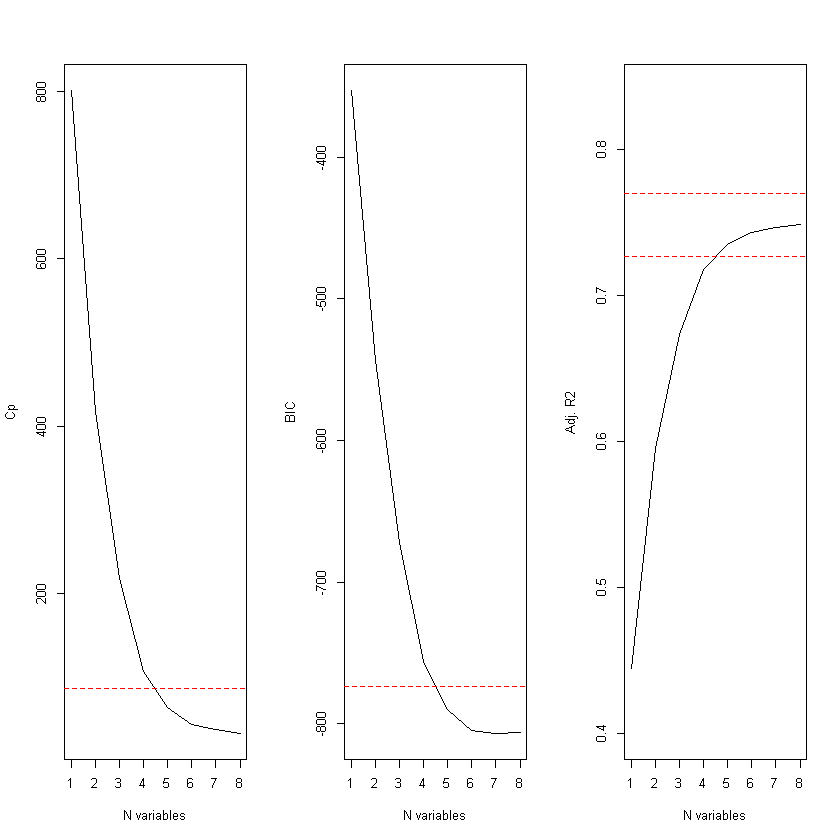

In [6]:
par(mfrow = c(1, 3))
plot(fit.summary$cp, xlab = "N variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary$cp)
std.cp <- sd(fit.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(fit.summary$bic, xlab = "N variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary$bic)
std.bic <- sd(fit.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(fit.summary$adjr2, xlab = "N variables", ylab = "Adj. R2", type = "l", ylim = c(0.4, 0.84))
max.adjr2 <- max(fit.summary$adjr2)
std.adjr2 <- sd(fit.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)

In [7]:
fit <- regsubsets(Outstate ~ ., data = College, method = "forward")
coeffs <- coef(fit, id = 6)
names(coeffs)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

*(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.*

In [8]:
library(mgcv)

Warning message:
"package 'mgcv' was built under R version 3.6.2"Loading required package: nlme
Warning message:
"package 'nlme' was built under R version 3.6.2"This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.


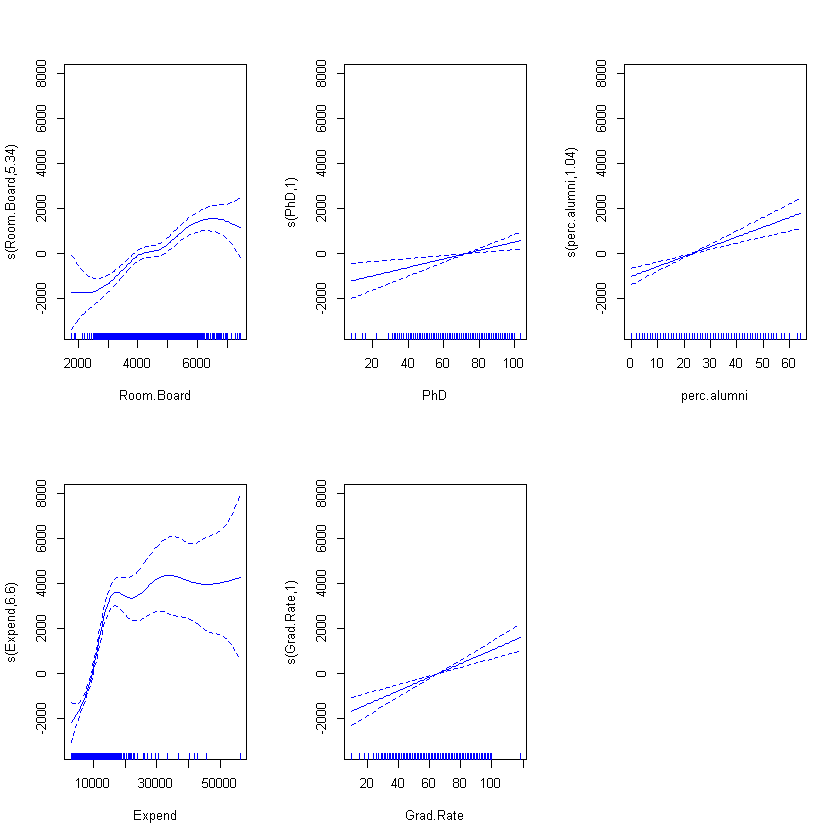

In [10]:
fit <- gam(Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + 
           s(Expend) + s(Grad.Rate), data=College.train)
par(mfrow = c(2, 3))
plot(fit, se = T, col = "blue")

*(c) Evaluate the model obtained on the test set, and explain the
results obtained.*

In [11]:
preds <- predict(fit, College.test)
err <- mean((College.test$Outstate - preds)^2)
err

[1] 3078877

In [12]:
tss <- mean((College.test$Outstate - mean(College.test$Outstate))^2)
rss <- 1 - err / tss
rss

[1] 0.7805275

*(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?*

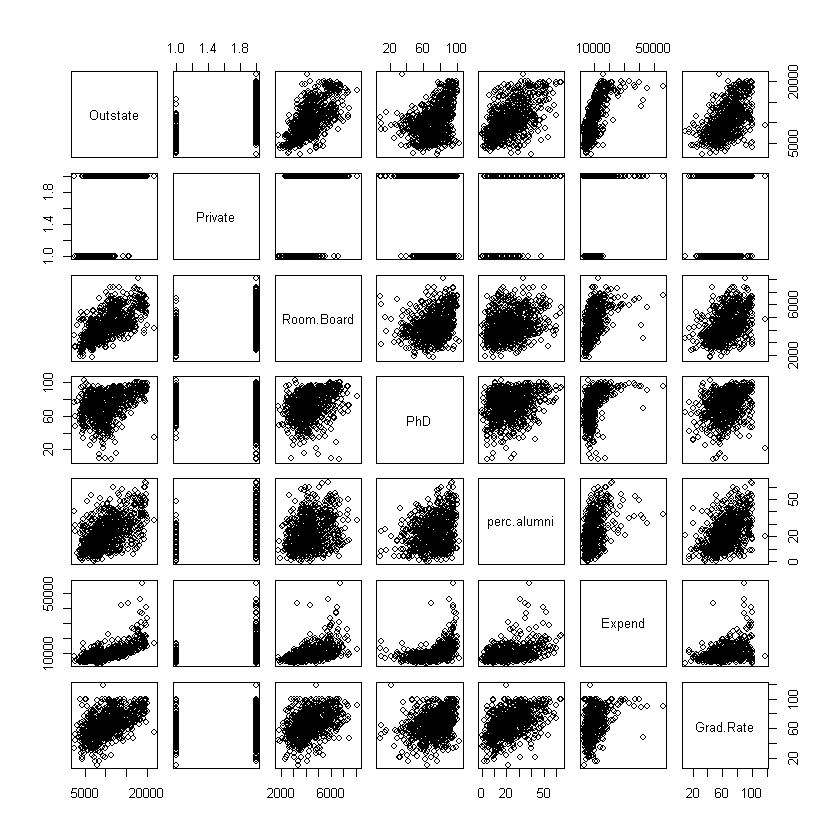

In [19]:
pairs <- College[,c("Outstate",'Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate')]
pairs(pairs)
#Room.Board, Expend and Grad.Rate are the clearest examples

In [13]:
summary(fit)


Family: gaussian 
Link function: identity 

Formula:
Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + 
    s(Expend) + s(Grad.Rate)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8700.7      181.8   47.86   <2e-16 ***
PrivateYes    2452.3      223.7   10.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F  p-value    
s(Room.Board)  5.340  6.527 12.384 6.48e-14 ***
s(PhD)         1.000  1.000  9.575  0.00206 ** 
s(perc.alumni) 1.036  1.071 28.085 8.42e-08 ***
s(Expend)      6.595  7.715 32.555  < 2e-16 ***
s(Grad.Rate)   1.000  1.000 29.418 8.34e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.787   Deviance explained = 79.3%
GCV = 3.6497e+06  Scale est. = 3.5499e+06  n = 621